In [28]:
import xarray as xr
import numpy as np 
from matplotlib import pyplot as plt
from matplotlib import cm

In [2]:
## Okay so I decided to make a new notebook because it's way easier to...
## ...organize things this way 

## Alright anywho, let's now look at the (somewhat) opposite proccess of primary production, which is respiration!
## We're going to use AOU (apparent oxygen utilization) as an indicator of respiration because..
    # A) Using the amount of accumulated carbon dioxide wouldn't be totally accurate since carbon dioxide levels gets too involved into carbonate chemistry 
    # Oxygen, on the other hand, is a reactant in the respiration equation/mechanism
    # AOU essentially measures the amount of oxygen that was used up in this respiration equation (more or less) and would be a sort of proxy to indicate how much..
    #..organic matter is being oxidized 
    # The AOU variable is an equation where the amount of oxygen that is respired is subtracted from the amount of oxygen in the ocean that's involved with sea-air exchange


In [29]:
### Alright, now that that's established, let's call in our directories:

rootdir = '/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/'

# We're going to start with ANNUAL respiration

datadir_ann = 'ocean_cobalt_omip_tracers_year_z/ts/annual/5yr/'
filename_ann_o2 = 'ocean_cobalt_omip_tracers_year_z.0711-0715.o2.nc'
filename_ann_o2sat = 'ocean_cobalt_omip_tracers_year_z.0711-0715.o2sat.nc'
filename_ann_vol = 'ocean_cobalt_omip_tracers_year_z.0711-0715.volcello.nc'

datadir_temp = 'ocean_annual_z/ts/annual/5yr/'
filename_temp = 'ocean_annual_z.0711-0715.thetao.nc'

## MONTHLY respiration 

datadir_mon_aou = 'ocean_cobalt_omip_tracers_month_z/av/monthly_5yr/'
filename_mon_aou = 'ocean_cobalt_omip_tracers_month_z.0711-0715.*.nc'


datadir_mon_temp = 'ocean_monthly_z/av/monthly_5yr/'
filename_mon_temp = 'ocean_monthly_z.0711-0715.*.nc'


In [30]:
# Annual data 

aou_ann_o2 = xr.open_dataset(rootdir+datadir_ann+filename_ann_o2)
aou_ann_o2sat = xr.open_dataset(rootdir+datadir_ann+filename_ann_o2sat)
aou_ann_vol = xr.open_dataset(rootdir+datadir_ann+filename_ann_vol)

aou_ann_temp = xr.open_dataset(rootdir+datadir_temp+filename_temp)

/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/xarray/coding/times.py:419: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  self.use_cftime)


In [31]:
# Monthly data

aou_mon_variables = xr.open_mfdataset(rootdir+datadir_mon_aou+filename_mon_aou)
aou_mon_temp = xr.open_mfdataset(rootdir+datadir_mon_temp+filename_mon_temp)

In [32]:
## Now we're going to create the datasets

# Annual data

dm = xr.merge([aou_ann_o2, aou_ann_o2sat, aou_ann_vol, aou_ann_temp])

# Monthly data

do = xr.merge([aou_mon_variables.o2, aou_mon_variables.o2sat, aou_mon_variables.volcello, aou_mon_temp.thetao])

/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/pyt

In [33]:
### Annual respiration x volume variables 
## This is going to be a little different from previous notebooks..
## ..where I only multiplied one variable by volume
## We're going to multiply both o2 and o2sat by volume to get the mole content
## We're also going to subtract o2 from o2sat


# Annual amount of moles of oxygen/saturated oxygen 

o2V_ann = dm.o2 * dm.volcello
o2V_ann.name = 'o2V_ann'

o2satV_ann = dm.o2sat * dm.volcello
o2satV_ann.name = 'o2satV_ann'

AOU_ann = o2satV_ann - o2V_ann 
AOU_ann.name = 'AOU_ann'

dm = xr.merge([dm, AOU_ann])


# Monthly amount of moles of oxygen/saturdated oxygen

o2V_mon = do.o2 * do.volcello
o2V_mon.name = 'o2V_mon'

o2satV_mon = do.o2sat * do.volcello
o2satV_mon.name = 'o2satV_mon'

AOU_mon = o2satV_mon - o2V_mon 
AOU_mon.name = 'AOU_mon'

do = xr.merge([do, AOU_mon])

In [34]:
# Annual temperature binning

dm = dm.set_coords('thetao')

# Monthly temperature binning 

do = do.set_coords('thetao')

theta_bins = np.arange(-2,30,2)

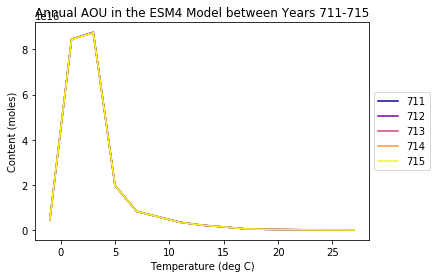

In [15]:
## Let's start out with ANNUAL respiration (apparent oxygen utilization)

labels = ["711", "712", "713", "714", "715"]
colors = cm.get_cmap('plasma',5).colors 

for t in range(5):

    AOU_ann_in_theta = dm.AOU_ann.isel(time=t,yh=range(0,576)).groupby_bins('thetao',theta_bins)
 
    AOU_ann_sum = AOU_ann_in_theta.sum(xr.ALL_DIMS)
    
    AOU_ann_sum.plot(label=labels[t], color=colors[t,:])
       
    
plt.title('Annual AOU in the ESM4 Model between Years 711-715')
plt.xlabel('Temperature (deg C)')
plt.ylabel('Content (moles)')
plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))

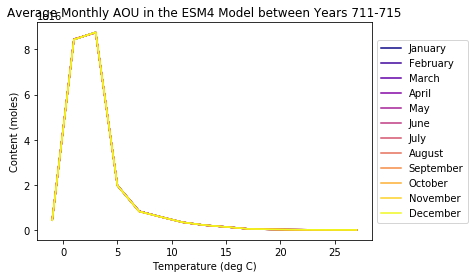

In [35]:
## And now MONTHLY AOU

labels = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
colors = cm.get_cmap('plasma',12).colors 

for t in range(12):
    AOU_mon_in_theta = do.AOU_mon.isel(time=t,yh=range(0,576)).groupby_bins('thetao',theta_bins)
    
 
    AOU_mon_sum = AOU_mon_in_theta.sum(xr.ALL_DIMS)
       

    AOU_mon_sum.plot(label=labels[t], color=colors[t,:])
    
plt.title('Average Monthly AOU in the ESM4 Model between Years 711-715')
plt.xlabel('Temperature (deg C)')
plt.ylabel('Content (moles)')
plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))

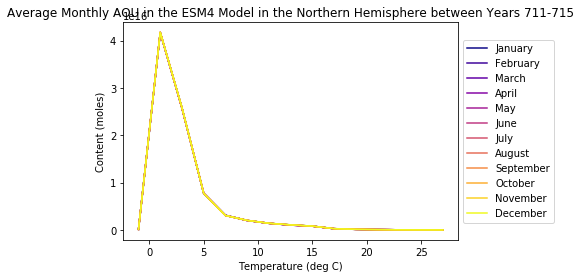

In [17]:
## Let's look at monthly AOU in the Northern hemisphere

labels = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
colors = cm.get_cmap('plasma',12).colors 

for t in range(12):
    AOU_mon_in_theta = do.AOU_mon.isel(time=t,yh=range(288,576)).groupby_bins('thetao',theta_bins)
    
 
    AOU_mon_sum = AOU_mon_in_theta.sum(xr.ALL_DIMS)
       

    AOU_mon_sum.plot(label=labels[t], color=colors[t,:])
    
plt.title('Average Monthly AOU in the ESM4 Model in the Northern Hemisphere between Years 711-715')
plt.xlabel('Temperature (deg C)')
plt.ylabel('Content (moles)')
plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))

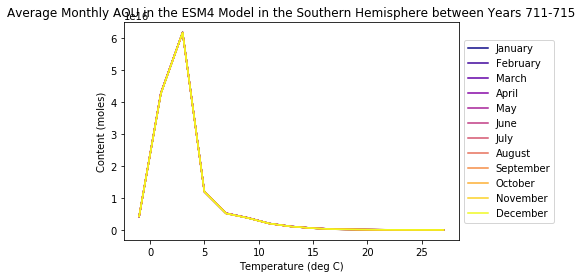

In [18]:
## ..and the monthly AOU in the Southern hemisphere 

labels = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
colors = cm.get_cmap('plasma',12).colors 

for t in range(12):
    AOU_mon_in_theta = do.AOU_mon.isel(time=t,yh=range(0,288)).groupby_bins('thetao',theta_bins)
    
 
    AOU_mon_sum = AOU_mon_in_theta.sum(xr.ALL_DIMS)
       

    AOU_mon_sum.plot(label=labels[t], color=colors[t,:])
    
plt.title('Average Monthly AOU in the ESM4 Model in the Southern Hemisphere between Years 711-715')
plt.xlabel('Temperature (deg C)')
plt.ylabel('Content (moles)')
plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))

In [25]:
## Okay so these graphs looks REALLY weird to me.
## I'm thinking it could be the way that I did the calculation for AOU
## Let's try it a different way...

#Annual

AOU_ann_subt = (dm.o2sat - dm.o2)
AOU_ann_subt.name = 'AOU_ann_subt'

AOU_ann_mol = AOU_ann_subt * dm.volcello
AOU_ann_mol.name = 'AOU_ann_mol'


dm = xr.merge([dm, AOU_ann_mol])


# Monthly amount of moles of oxygen/saturdated oxygen

AOU_mon_subt = do.o2sat - do.o2
AOU_mon_subt.name = 'AOU_ann_subt'

AOU_mon_mol = AOU_mon_subt * do.volcello
AOU_mon_mol.name = 'AOU_mon_mol'


do = xr.merge([do, AOU_mon_mol])


In [26]:
# Annual temperature binning

dm = dm.set_coords('thetao')

# Monthly temperature binning 

do = do.set_coords('thetao')

theta_bins = np.arange(-2,30,2)

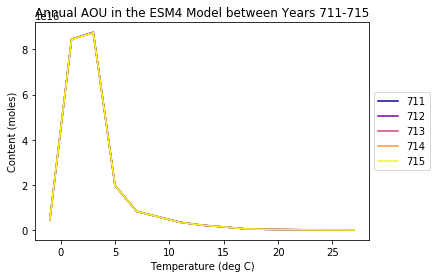

In [23]:
## Let's try the annual amount of AOU first 

labels = ["711", "712", "713", "714", "715"]
colors = cm.get_cmap('plasma',5).colors 

for t in range(5):

    AOU_ann_in_theta2 = dm.AOU_ann_mol.isel(time=t,yh=range(0,576)).groupby_bins('thetao',theta_bins)
 
    AOU_ann_sum2 = AOU_ann_in_theta2.sum(xr.ALL_DIMS)
    
    AOU_ann_sum2.plot(label=labels[t], color=colors[t,:])
       
    
plt.title('Annual AOU in the ESM4 Model between Years 711-715')
plt.xlabel('Temperature (deg C)')
plt.ylabel('Content (moles)')
plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))

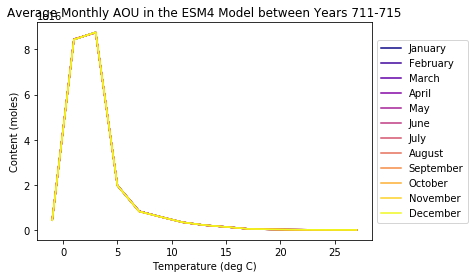

In [27]:
## Monthly AOU! 

labels = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
colors = cm.get_cmap('plasma',12).colors 

for t in range(12):
    AOU_mon_in_theta2 = do.AOU_mon_mol.isel(time=t,yh=range(0,576)).groupby_bins('thetao',theta_bins)
    
 
    AOU_mon_sum2 = AOU_mon_in_theta2.sum(xr.ALL_DIMS)
       

    AOU_mon_sum2.plot(label=labels[t], color=colors[t,:])
    
plt.title('Average Monthly AOU in the ESM4 Model between Years 711-715')
plt.xlabel('Temperature (deg C)')
plt.ylabel('Content (moles)')
plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))

In [ ]:
### Okay so the same output is produced between the two calculations
### THIS LOOKS SO WEIRD THOUGH!!!!!!!! WHAT THE F$%#!  